# Week 12 Assignment

# PART 1 - Pivoting Data for Fun!

In this exercise, we're going to work with data about condemned buildings in St. Louis.  This data set is in `https://hds5210-data.s3.awsamazon.com/condemn.txt` in CSV format.

## STEP 1: Load and Filter data

For this analysis, we want to look only at a relevent range of years and only years that are in the past.  So, let's first take a look at the data between 1986 and 2014 (inclusive of those dates).

At the end of this step, you should have a data frame loaded from the condemnations file and filtered down to only the data between 1986 and 2014.  Put that into a dataframe named `condemnations`

**Some helpful notes:**
* Use the columns `InspectDate` to filter this date range

In [42]:
%matplotlib inline
import pandas as pd

condemnations = pd.read_csv('https://hds5210-data.s3.amazonaws.com/condemn.txt', low_memory=False)
condemnations.shape

(32586, 40)

In [43]:
condemnations.head()

,AcctNum,PrclErr,AddrAdjusted,CityBlock,Parcel,OwnerCode,Handle,Parcel9,AddrNum,AddrSuf,...,CensBlock00,AsrNbrhd,ImpactCode,NLC,Parity,Inspector,Images,FirstDate,LastDate,UpDateGeo
0,1.0,0.0,False,3652.00,341.0,1.0,1.365200e+10,365200341.0,4049,,...,1114.4006,309.0,0.0,123.0,O,NaN,NaN,1987-08-07 00:00:00,2019-01-04 00:00:00,NaN
1,2.0,0.0,False,666.00,80.0,0.0,1.066600e+10,66600080.0,906,,...,1234.2003,248.0,0.0,104.0,E,NaN,NaN,1988-06-28 00:00:00,2019-01-04 00:00:00,NaN
2,3.0,0.0,False,3913.01,120.0,1.0,1.391301e+10,391301120.0,4218,,...,1191.1004,230.0,0.0,210.0,E,NaN,NaN,1990-08-28 00:00:00,2019-01-04 00:00:00,NaN
3,4.0,2.0,False,3744.00,145.0,0.0,1.374400e+10,374400145.0,4145,,...,1111.4000,231.0,0.0,92.0,O,NaN,NaN,1990-06-12 00:00:00,2019-01-04 00:00:00,NaN
4,5.0,0.0,False,1103.00,30.0,0.0,1.110300e+10,110300030.0,1936,,...,1266.5001,318.0,0.0,5.0,E,NaN,NaN,2006-12-21 00:00:00,2019-01-04 00:00:00,NaN


In [44]:
condemnations.shape

(32586, 40)

In [45]:
condemnations.columns

Index(['AcctNum', 'PrclErr', 'AddrAdjusted', 'CityBlock', 'Parcel',
       'OwnerCode', 'Handle', 'Parcel9', 'AddrNum', 'AddrSuf', 'StDir',
       'StName', 'StType', 'InspectDate', 'InspectType', 'CondLetterSent',
       'Status', 'OwnerCompany', 'OwnerName', 'OwnerAddr', 'OwnerCity',
       'OwnerState', 'OwnerZIP', 'GeoCityBLockPart', 'Ward00', 'Precinct02',
       'Nbrhd', 'CDADist', 'CDASubDist', 'PoliceDist', 'CensBlock00',
       'AsrNbrhd', 'ImpactCode', 'NLC', 'Parity', 'Inspector', 'Images',
       'FirstDate', 'LastDate', 'UpDateGeo'],
      dtype='object')

In [46]:
import pandas as pd
start_date = '1985-12-31'
end_date = '2015-01-01'
cond = f"InspectDate > '{start_date}'  and InspectDate < '{end_date}'"
condemnations = condemnations.query(cond)

In [47]:
assert(condemnations.shape == (30232, 40))
assert(len(condemnations[condemnations['InspectDate'] < '1986'])==0)
assert(len(condemnations[condemnations['InspectDate'] >= '2015'])==0)

## STEP 2: Pivot and Summarize

In this step we want to pivot our data so that we have one row per year, a column for each value that appears in the `Status` column, and a count of how many condemnations occurred of each type in each year.  Put your summary pivot table into a variable called `by_year`.

**Some helpful notes:**
* For some reason, Pandas is just kind of stubborn about count being the aggregate function.  You may need to tell it to `np.ma.count` specifically.  I've imported Numpy as np for you.

In [48]:
import numpy as np
condemnations["Status"].unique()

array(['W', 'B', nan, 'L', 'R'], dtype=object)

In [64]:
condemnations['Year'] = pd.to_datetime(condemnations['InspectDate']).dt.year

In [65]:
by_year=condemnations.groupby(['Year', 'Status']).size().unstack(fill_value=0)

In [66]:
by_year

Status,B,L,R,W
Year,,,,
1986,22,12,19,112
1987,91,20,8,361
1988,215,16,15,297
1989,277,15,11,432
1990,119,29,8,322
1991,139,18,4,351
1992,204,30,4,258
1993,185,47,2,193
1994,208,94,5,293


In [52]:
assert(by_year.shape == (29, 4))
assert(list(by_year.columns) == ['B', 'L', 'R', 'W'])
assert(list(by_year.sum()) == [10572, 4966, 98, 9670])

## STEP 3: Plot and see what you see

Use Pandas built-in plotting capabilities to visualize this information in way that you think makes sense.  It might be that plotting a simple multi-series line chart would give you some insights.  Show your plot in the cell below, then use the text cell below that to write a few sentences about what you see.


<Axes: xlabel='Year'>

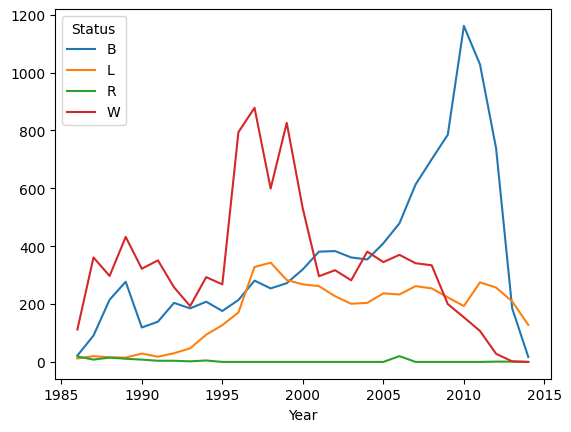

In [53]:
%matplotlib inline
by_year.plot()

With years on the x-axis, the line graph shows trends for the four statuses (B, L, R, and W) across time. The maximum activity is displayed by the blue line (B), which peaked between 2005 and 2010 at values between 1000 and 1200 before abruptly dropping to zero by 2015. Significant variations may be seen in the red line (R), which peaks between 1995 and 2000 before declining progressively after 2010. Throughout the timeframe, the orange line (L) stays quite low, with a slight peak around 1995. In every year, the green line (W) exhibits the least amount of activity with little fluctuation. Following their respective maxima, the values of all statuses sharply decrease before convergently approaching zero by 2015.    This suggests that overall activity in all categories decreased significantly in subsequent years.

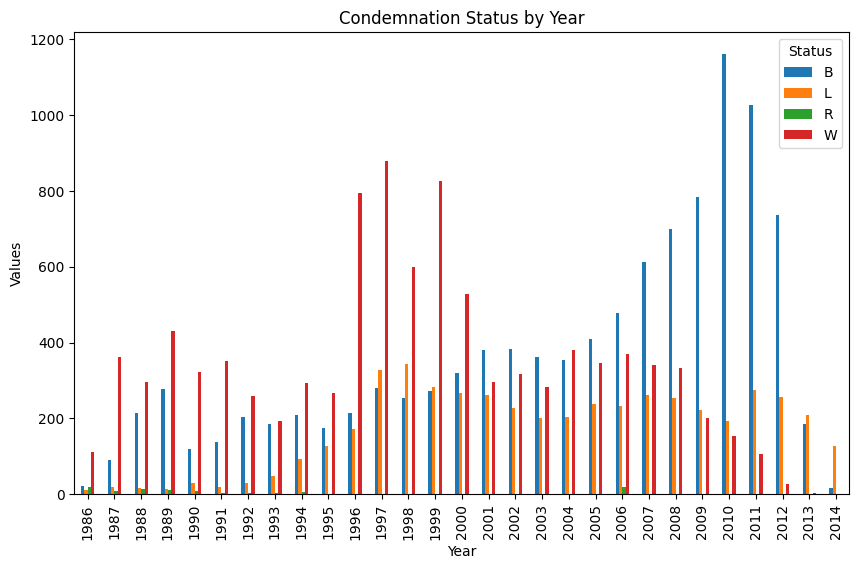

In [54]:
import matplotlib.pyplot as plt
by_year.plot(kind='bar', stacked=False, figsize=(10,6))
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Condemnation Status by Year')
plt.legend(title='Status')
plt.show()

"Condemnation Status by Year" from 1986 to 2014 is depicted in the graph. Condemnation lawsuits are generally on the rise, reaching a high in 2011 before precipitously falling. Red bars (R), which exhibit noticeable jumps, particularly in the late 1990s, are followed by blue bars (B), which consistently have the highest values for the majority of years. Green (W) and orange (L) bars are far less common and have much lower values. Notable years with notable increases in condemnation cases are 1998 and 2011. All categories show a sharp drop after 2011, with values all but vanished by 2014. This implies that condemnation activity decreased significantly in the timeline's last few years.

---

# PART 2 - Video Conference Usage

In this next part of the assignment, we'll be looking at how video conference usage changed during the beginning of COVID-19.  This real data.  Please don't judge anyone based on the information here.  ;)  The data is in the `https://hds5210-data.s3.amazonaws.com/meetings.csv` file.

For the assignment, I want you to compare (by person) the number of meetings hosted by each user for the last two weeks of February and the last two weeks of March.  This might be a little complicated to think through HOW to do that, so the steps below are one approach.

1. Create a new column called startDate that contains just the day part of the startTime column in the data.  You can do that using datetime functions if you want, but you'll notice that the date in this file is a string formatted YYYY-MM-DD-HH:mm:ss, so it's probably easier just to pull out the first 10 characters of the string instead.  `meetings['startTime'].str[0:10]`
2. Create another new column.  This one should contain a label like "BEFORE" for the week 2/17 - 2/28 and "DURING" for the week of 3/16 - 3/27.  A hand tip on this is that you can set values for some rows in a data frame using `meetings.loc[row_filter,'Column Name'] = 'Value'` if you've created a `row_filter` as we discussed in prior weeks.
3. From here, using `pivot_table()` is one good way to summarize the information.

**FINAL RESULT**

For a final result, I'd like you to produce a data frame named **summary** that contains:
* One ROW for each userName.  The userName can either be the row index or a column in the data frame.
* One COLUMN for the "BEFORE" week and one COLUMN for the "DURING" week.  Name those columns 'Before' and 'During'.
* One more calculated column that shows the percent increase from BEFORE to DURING.  Name that column 'pctChange'.


In [55]:
import pandas as pd
meetings = pd.read_csv('https://hds5210-data.s3.amazonaws.com/meetings.csv')

In [56]:
meetings['startDate'] = meetings['startTime'].apply(lambda x: pd.to_datetime(x[0:10]))

In [57]:
#One COLUMN for the "BEFORE" week and one COLUMN for the "DURING" week. Name those columns 'Before' and 'During'.
import numpy as np

conditions = [
    meetings['startDate'].between('2020-02-17', '2020-02-28'),
    meetings['startDate'].between('2020-03-16', '2020-03-27')
]
values = ['BEFORE', 'DURING']
meetings['Period'] = np.select(conditions, values, default=None)

In [58]:
summary = meetings.groupby(['userName', 'Period']).size().unstack(fill_value=0)

In [59]:
#summary for One COLUMN for the "BEFORE" week and one COLUMN for the "DURING" week. Name those columns 'Before' and 'During'.
summary

Period,BEFORE,DURING
userName,,
Drew.Marco,12,19
amit.bhagat,17,30
andrea.bryant.amitechsolutions,5,3
angie.warren,5,9
chris.rogers.amitechsolutions,4,3
eric.keeney,15,27
eric.rodman,4,12
jeff.hatfield.amitechsolutions,13,26
jennifer.patton.amitechs,5,7


In [60]:
#One more calculated column that shows the percent increase from BEFORE to DURING. Name that column 'pctChange'.

summary = (
    meetings.groupby(['userName', 'Period'])
    .size()
    .unstack(fill_value=0)
    .assign(pctChange=lambda x: (x['DURING'] - x['BEFORE']) / x['BEFORE'])
    .rename(columns={'BEFORE': 'Before', 'DURING': 'During', 'pctChange': 'pctChange'})
)

In [61]:
#summary for One more calculated column that shows the percent increase from BEFORE to DURING. Name that column 'pctChange'.
summary

Period,Before,During,pctChange
userName,,,
Drew.Marco,12,19,0.583333
amit.bhagat,17,30,0.764706
andrea.bryant.amitechsolutions,5,3,-0.400000
angie.warren,5,9,0.800000
chris.rogers.amitechsolutions,4,3,-0.250000
eric.keeney,15,27,0.800000
eric.rodman,4,12,2.000000
jeff.hatfield.amitechsolutions,13,26,1.000000
jennifer.patton.amitechs,5,7,0.400000


---

In [62]:
assert(len(summary) == 22)

In [63]:
assert(summary['pctChange'].mean().round(2) == 0.92)



---



## Submitting Your Work

Submit as usual
